# Задание
### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

    построить не менее 4 визуализаций различных видов;
    каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
    по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

### Дополнительная часть (необязательная)

    построить дополнительно не менее 2 визуализаций (итого не менее 6);
    в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
    
   [Ссылка на датасет](https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download&select=2019.csv)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# данные об уровне счастья в разных странах за 2019г. 
df = pd.read_csv('2019.csv')
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


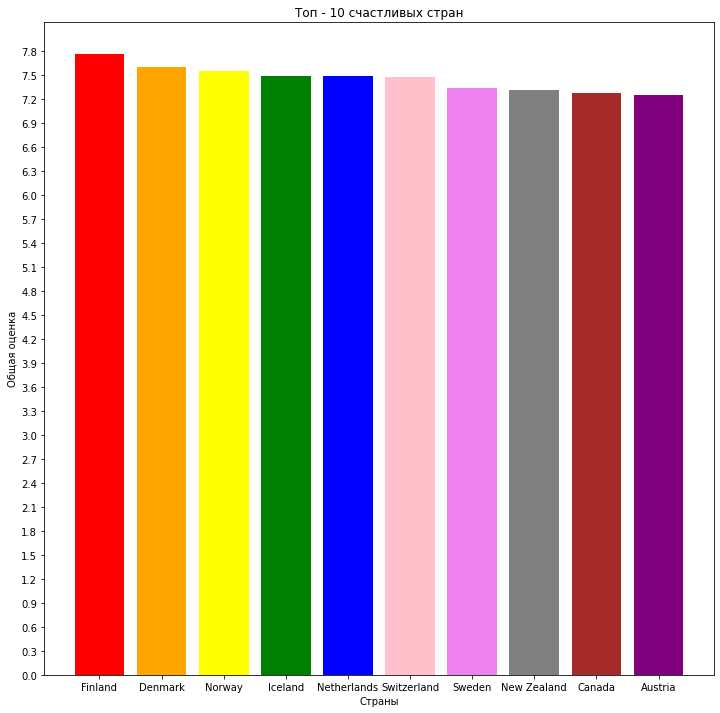

In [4]:
# оценка счастья людей по данным всемирного опроса

a = df['Country or region'].iloc[:10] 
b = df['Score'].iloc[:10]

plt.figure(figsize=[12, 12])
plt.bar(a, b, color=['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'violet','gray', 'brown', 'purple'])
plt.title('Топ - 10 счастливых стран')
plt.xlabel('Страны')
plt.ylabel('Общая оценка')
plt.yticks(np.arange(0, 8, 0.3))
plt.show()

# Большая часть стран находится в западной Европе, выделяется Канада и Новая Зеландия. 
# Жители этих стран высоко оценивают уровень своего счастья

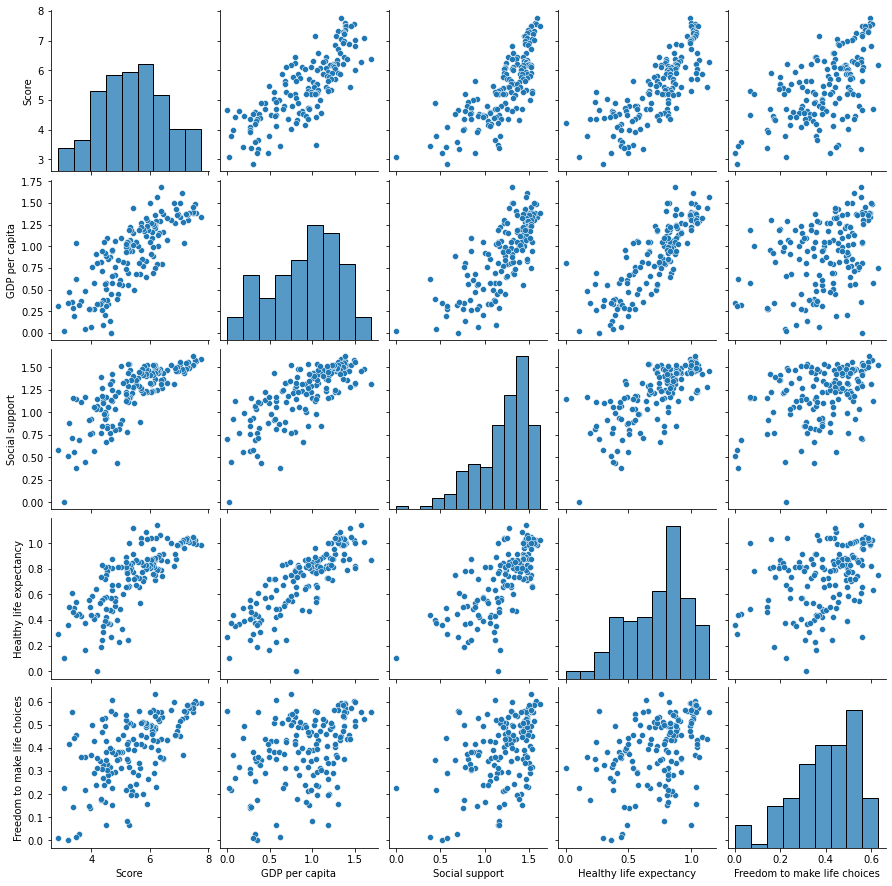

In [5]:
# поиск взаимосвязей между данными
cols = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices']
sns.pairplot(df[cols])

# Все 4 фактора положительно коррелируют с показателем счастья и между собой, что означает, 
#что увеличение этих факторов способствует увеличению показателя счастья. 

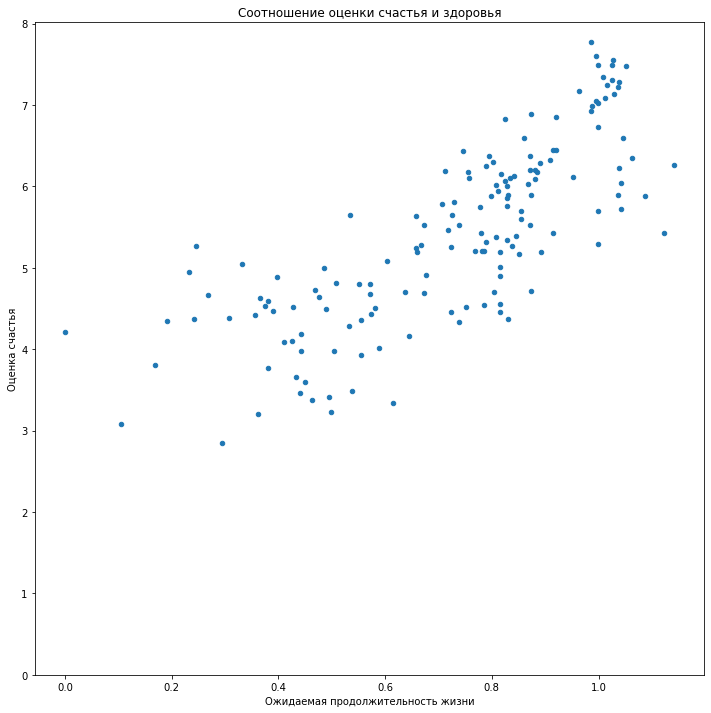

In [6]:
# связь между показателями счастья и здоровья

df.plot(kind='scatter', 
        x='Healthy life expectancy', 
        y='Score', 
        title='Соотношение оценки счастья и здоровья',
        figsize=(12, 12)
       )
plt.xlabel('Ожидаемая продолжительность жизни')
plt.ylabel('Оценка счастья')
plt.yticks(np.arange(0, 9))
plt.show()

# В странах, где выше ожидания людей о продолжительности жизни, выше и уровень счастья. Скорее всего, это связано с высоким уровнем медицины, ее доступностью, 
# высокими показателями соц.поддержки 

<AxesSubplot:>

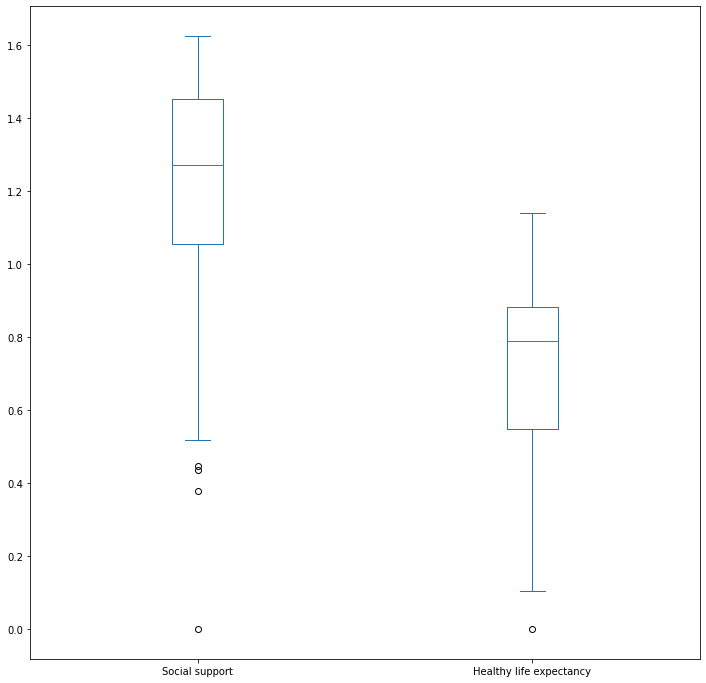

In [7]:
# Ящик с усами соц.поддежки и ожидаемая продолжительность жизни

df[['Social support', 'Healthy life expectancy']].plot(kind='box',
                                                       figsize = (12, 12))

# Видим выбросы, где соц.поддежка и ожидания равны нулю, скорее всего просто нет данных 

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


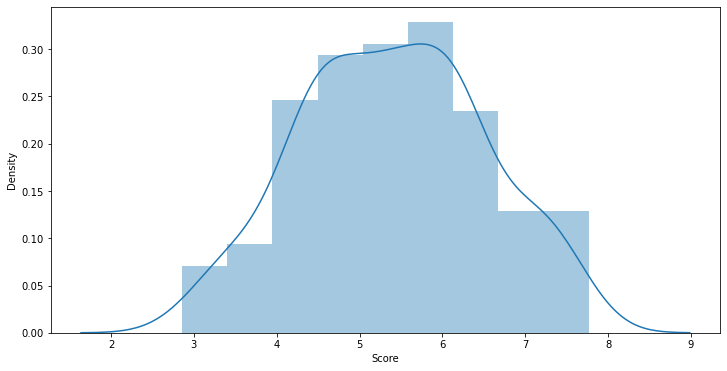

In [8]:
# распределение целевой переменной

plt.figure(figsize=(12, 6))
ax = sns.distplot(df['Score'])                 
    

# Видим почти нормальное распределение

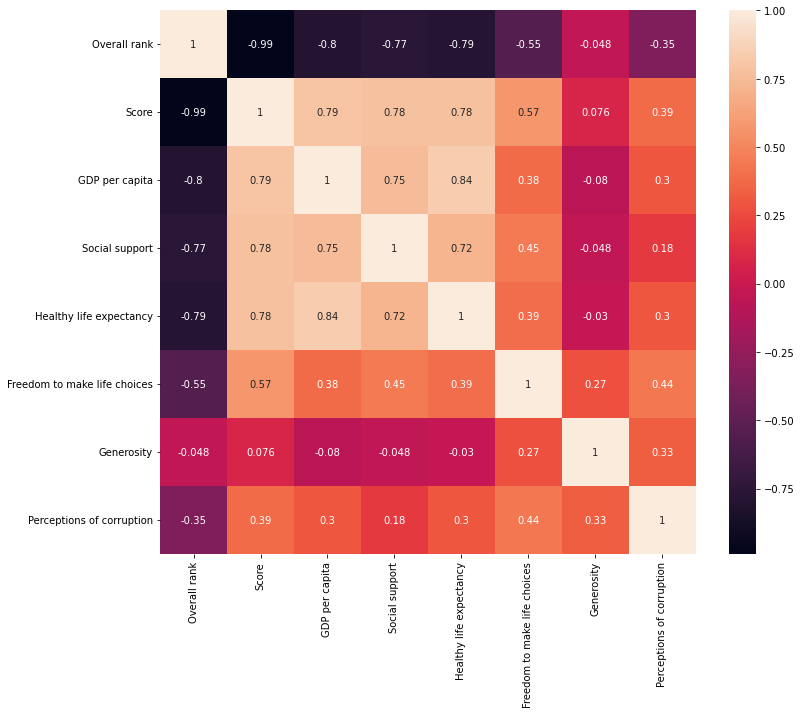

In [9]:
# корреляция между значениями

df = df.corr()
plt.subplots(figsize=(12, 10))
sns.heatmap(df, annot = True)
plt.show()
# Здесь можно заметить, что ожидаемая продолжительность жизни, соц.поддержка, ВВП сильно коррелирует с оценкой счастья. 
# Свобода выбора и уровень коррупции так же достаточно сильно связана с оценкой